# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('datasets/real_estate_data.csv', sep='\t')
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

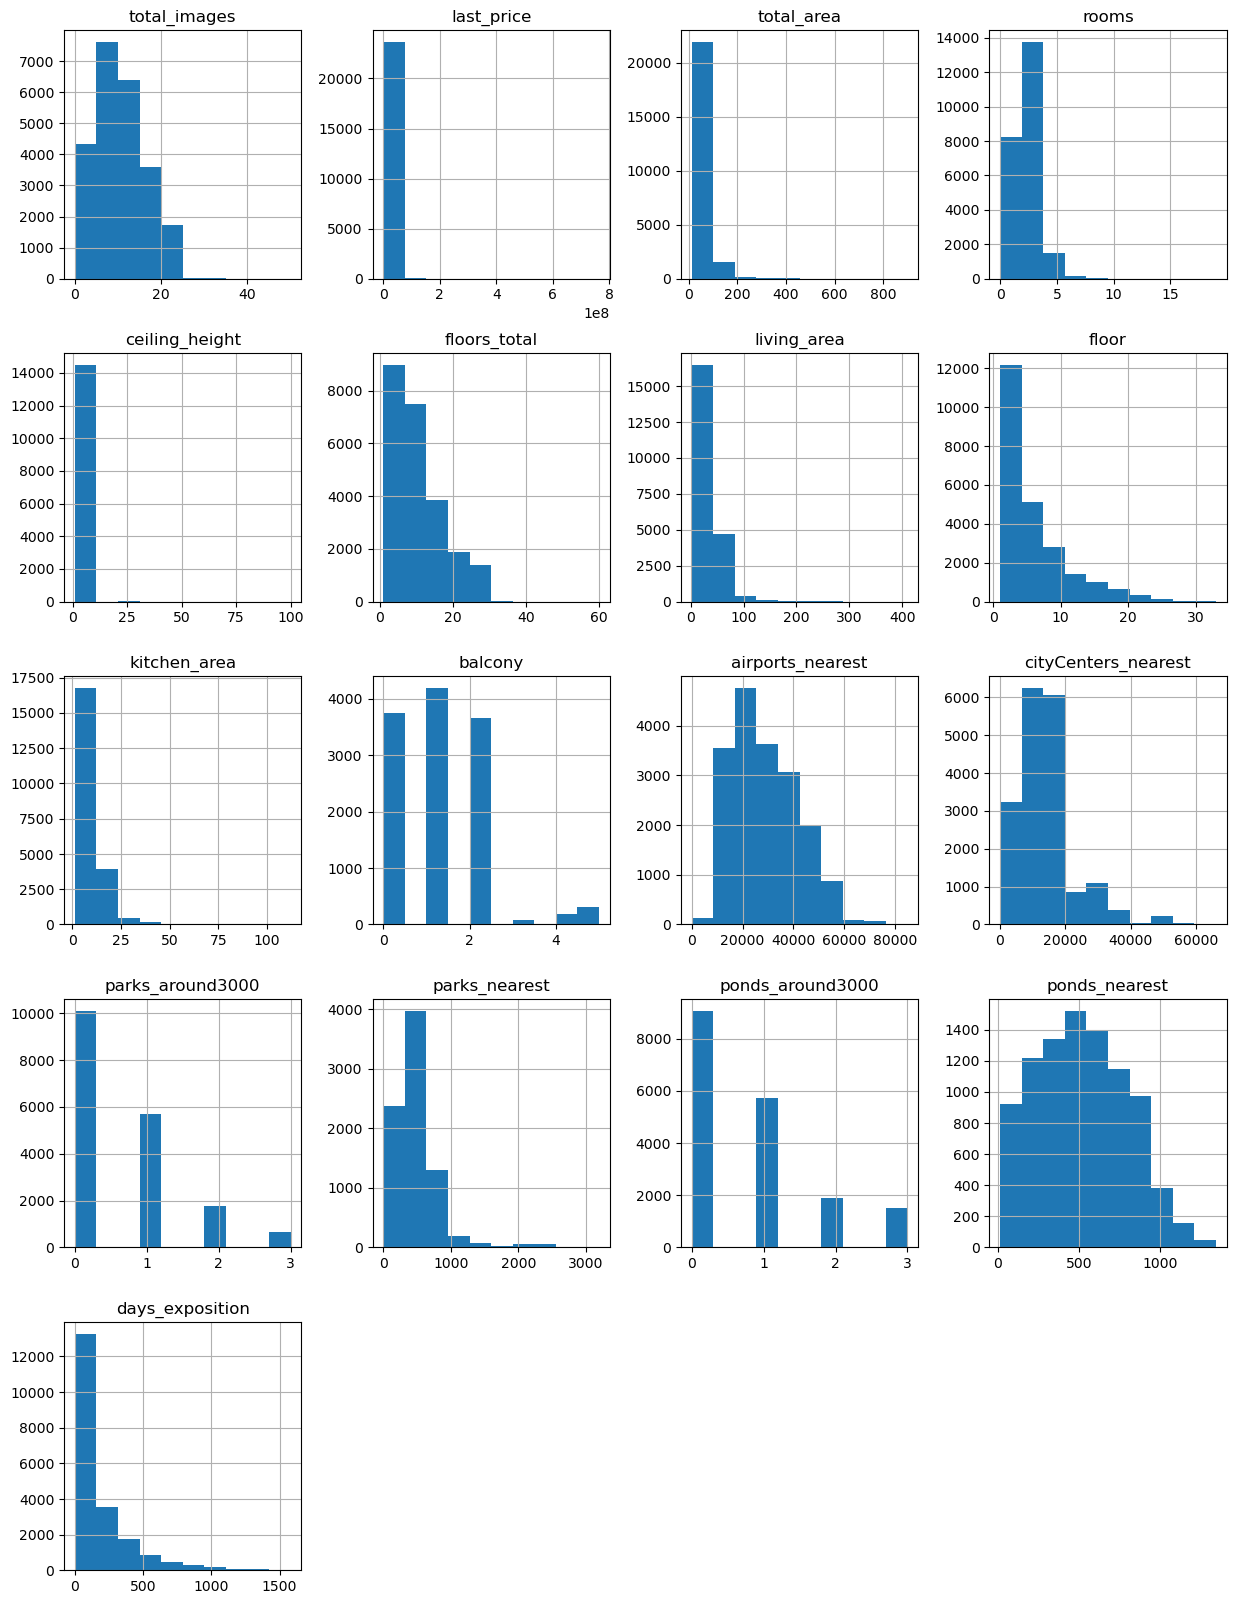

In [4]:
data.hist(figsize=(15, 20))

### Предобработка данных

Посмотрим где есть пропуски:

In [5]:
miss_data = data.isnull()
for column in miss_data.columns.values.tolist():
    print(column)
    print(miss_data[column].value_counts())
    print(" ")


total_images
False    23699
Name: total_images, dtype: int64
 
last_price
False    23699
Name: last_price, dtype: int64
 
total_area
False    23699
Name: total_area, dtype: int64
 
first_day_exposition
False    23699
Name: first_day_exposition, dtype: int64
 
rooms
False    23699
Name: rooms, dtype: int64
 
ceiling_height
False    14504
True      9195
Name: ceiling_height, dtype: int64
 
floors_total
False    23613
True        86
Name: floors_total, dtype: int64
 
living_area
False    21796
True      1903
Name: living_area, dtype: int64
 
floor
False    23699
Name: floor, dtype: int64
 
is_apartment
True     20924
False     2775
Name: is_apartment, dtype: int64
 
studio
False    23699
Name: studio, dtype: int64
 
open_plan
False    23699
Name: open_plan, dtype: int64
 
kitchen_area
False    21421
True      2278
Name: kitchen_area, dtype: int64
 
balcony
False    12180
True     11519
Name: balcony, dtype: int64
 
locality_name
False    23650
True        49
Name: locality_name, dtype: in

Пропуски найдены в данных столбцах:

* ceiling_height - количественная
* floors_total - количественная
* living_area - количественная
* is_apartment - качественная
* kitchen_area - количественная
* balcony - количественная
* locality_name - качественная
* airports_nearest - количественная
* cityCenters_nearest - количественная
* parks_around3000 - количественная
* parks_nearest - количественная
* ponds_around3000 - количественная
* ponds_nearest - количественная
* days_exposition - количественная

В balcony, parks_around3000, ponds_around3000 пропуски можем заменить на 0, т.к. очевидно если присутсвует пропуски то наличия в данных категориях отсутсвует. Заодном поменяем тип на int

In [6]:
data['balcony'] = data['balcony'].fillna(0).astype(int)
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype(int)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype(int)

От наблюдений с пустыми значениями floors_total и locality_name избавимся, так как отсутствие этих данных помешает нам в дальнейших рассчётах. Для заполенения столбца locality_name нам бы могли понадобиться адрес или почтовый индекс квартиры, а для floors_total - высота дома.

Столбец floors_total приведем к типу данных int - в этом столбце не может быть вещественного типа данных.

In [7]:
data.dropna(subset=['floors_total', 'locality_name'], inplace=True)
data['floors_total'] = data['floors_total'].astype(int)

Пропуски в столбцах airports_nearest, cityCenters_nearest, parks_nearest и ponds_nearest заменим на нетипичные значения и будем учитывать в дальнейших рассчётах.

In [8]:
data['airports_nearest'] = data['airports_nearest'].fillna(-1)
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(-1)
data['parks_nearest'] = data['parks_nearest'].fillna(-1)
data['ponds_nearest'] = data['ponds_nearest'].fillna(-1)
data['days_exposition'] = data['days_exposition'].fillna(-1).astype(int)

Мы бы могли обработать пропуски в расстоянии до центра cityCenters_nearest сгруппировав объявления по названию населенного пункта locality_name, а затем высчитав медиану или среднее арифметическое, однако такой способ не сработает - для некоторых населенных пунктов (как городской посёлок Янино-1, к примеру), не дано расстояние до центра города, так как центра, скорее всего, нет. Поэтому, если мы будем пытаться заменить нетипичные значения (-1) на медиану или среднее, то результатом все равно окажется -1. В этом случае отсутсвие информации - это информация.

Можем предположить, что объявления с пропусками в days_exposition все ещё активны. Их можем попробовать обработать с помощью столбца locality_name.

In [9]:
data.query('days_exposition == -1')['days_exposition'].count() # посчитали количество пропусков

3171

In [10]:
locality_name_to_median = data.groupby('locality_name').median()['days_exposition'].to_dict() 
locality_name_to_median

{'Бокситогорск': 45.0,
 'Волосово': 93.0,
 'Волхов': 66.0,
 'Всеволожск': 85.0,
 'Выборг': 73.0,
 'Высоцк': 438.0,
 'Гатчина': 79.0,
 'Зеленогорск': 144.5,
 'Ивангород': 80.5,
 'Каменногорск': 85.0,
 'Кингисепп': 45.0,
 'Кириши': 45.0,
 'Кировск': 90.5,
 'Колпино': 63.0,
 'Коммунар': 93.0,
 'Красное Село': 105.5,
 'Кронштадт': 66.5,
 'Кудрово': 50.0,
 'Лодейное Поле': 126.5,
 'Ломоносов': 79.0,
 'Луга': 45.0,
 'Любань': 103.5,
 'Мурино': -1.0,
 'Никольское': 76.0,
 'Новая Ладога': 42.5,
 'Отрадное': 45.0,
 'Павловск': 117.0,
 'Петергоф': 82.0,
 'Пикалёво': 57.5,
 'Подпорожье': 42.0,
 'Приморск': 105.0,
 'Приозерск': 101.5,
 'Пушкин': 92.0,
 'Санкт-Петербург': 74.0,
 'Светогорск': 104.0,
 'Сертолово': 72.5,
 'Сестрорецк': 93.0,
 'Сланцы': 56.0,
 'Сосновый Бор': 45.0,
 'Сясьстрой': 71.5,
 'Тихвин': 45.0,
 'Тосно': 83.5,
 'Шлиссельбург': 55.0,
 'городской поселок Большая Ижора': 45.0,
 'городской поселок Янино-1': 55.0,
 'городской посёлок Будогощь': 44.5,
 'городской посёлок Виллози': 16

In [11]:
def fill_days_exp(row):
    days_exposition = row['days_exposition']
    locality_name = row['locality_name']
    if days_exposition == -1:
        return locality_name_to_median[locality_name]
    else:
        return days_exposition


data['days_exposition'] = data.apply(fill_days_exp, axis=1)
data.query('days_exposition == -1')['days_exposition'].count() # посчитали количество пропусков

100

Такое заполнение более эффективно, но после него пропуски все еще остались, заполним их медианным значением по всему столбцу.

In [12]:
data.loc[data['days_exposition'] == -1] = data['days_exposition'].median()
data.query('days_exposition == -1')['days_exposition'].count() # посчитали количество пропусков

0

В столбце is_apartment слишком мало ненулевых значений, у тому же, в процессе работы над проектом мы не будем использовать этот столбец, поэтому от него можно избавиться. Также можно избавиться от столбцов total_images, studio и open_plan - в дальнейшей работе они нам не понадобятся.

In [13]:
data.drop(['is_apartment', 'total_images', 'studio', 'open_plan'], axis='columns', inplace=True)

Значение пропусков в столбце living_area посчитаем с помощью медианы, предварительно заменив NaN значения на нетипичные и сгруппировав по общей площади квартиры. Для начала приведем значения в total_area к типу int для удобства подсчёта.

In [14]:
data['total_area'] = data['total_area'].round().astype(int)
data['living_area'] = data['living_area'].fillna(-1)
total_area_median = data.groupby('total_area').median()['living_area'].to_dict()

In [15]:
def liv_area_count(row):
    total_area = row['total_area']
    living_area = row['living_area']
    if living_area == -1:
        return total_area_median[total_area]
    else:
        return living_area


data['living_area'] = data.apply(liv_area_count, axis=1)
data.query('living_area == -1')['living_area'].count()
    

19

Функция сработала не во всех случаях, несколько ячеек в living_area всё ещё равны -1, для них не нашлось медианы. Эти значения выбиваются из общих данных, и их совсем мало - избавимся от них.

In [16]:
data = data.loc[data['living_area'] != -1]
data.query('living_area == -1')['living_area'].count()

0

Чтобы заполнить NaN значения в kitchen_area, найдем коэффициент корреляции для kitchen_area с total_area, чтобы выявить взаимосвязь этих параметров, и если она достаточно сильна, то найдем, какую часть общей площади занимает кухня. Этот параметр добавим в таблицу как kitchen_part, найдем среднее арифметическое по этому столбцу, а затем заполним по нему пропуски.

Данные в столбце kitchen_area округлим до десятых для удобства.

In [17]:
total_kitchen_area_corr = data['total_area'].corr(data['kitchen_area'])
total_kitchen_area_corr

0.4990557673715236

In [18]:
data['kitchen_part'] = data['kitchen_area'] / data['total_area']
kitchen_mean = data['kitchen_part'].mean()
kitchen_mean

C:\Users\dark_fail\AppData\Local\Temp\ipykernel_15456\1669494764.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['kitchen_part'] = data['kitchen_area'] / data['total_area']


0.19119439700973628

In [19]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] * kitchen_mean).round(1)
data

C:\Users\dark_fail\AppData\Local\Temp\ipykernel_15456\2002492881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] * kitchen_mean).round(1)


,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,kitchen_part
0,13000000.0,108,2019-03-07T00:00:00,3,2.70,16,51.0,8,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,74.0,0.231481
1,3350000.0,40,2018-12-04T00:00:00,1,NaN,11,18.6,1,11.0,2,посёлок Шушары,12817.0,18603.0,0,-1.0,0,-1.0,81.0,0.275000
2,5196000.0,56,2015-08-20T00:00:00,2,NaN,5,34.3,4,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,0.148214
3,64900000.0,159,2015-07-24T00:00:00,3,NaN,14,90.8,9,30.4,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,NaN
4,10000000.0,100,2018-06-19T00:00:00,2,3.03,14,32.0,13,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,0.410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9700000.0,134,2017-03-21T00:00:00,3,3.70,5,73.3,3,13.8,0,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,74.0,0.103209
23695,3100000.0,59,2018-01-15T00:00:00,3,NaN,5,38.0,4,8.5,0,Тосно,-1.0,-1.0,0,-1.0,0,-1.0,45.0,0.144068
23696,2500000.0,57,2018-02-11T00:00:00,2,NaN,3,29.7,1,10.9,0,село Рождествено,-1.0,-1.0,0,-1.0,0,-1.0,98.0,NaN
23697,11475000.0,77,2017-03-28T00:00:00,2,3.00,17,45.0,12,23.3,2,Санкт-Петербург,39140.0,10364.0,2,173.0,3,196.0,602.0,0.302597


Подумаем, как заполнить пропуски в ceiling_height. Заполнение их медианным или средним значением может привести к искажению данных, поэтому посмотрим на корреляцию и заполним пропуски на основании данных из другого столбца. Например, rooms.

In [20]:
data['ceiling_height'].corr(data['rooms'])

0.9682290321422924

Коэффициент корреляции очень высокий, этот столбец нам подходит.

In [21]:
data['ceiling_height'] = data['ceiling_height'].fillna(-1)
rooms_meadian = data.groupby('rooms').median()['ceiling_height'].to_dict()

C:\Users\dark_fail\AppData\Local\Temp\ipykernel_15456\3534042041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ceiling_height'] = data['ceiling_height'].fillna(-1)


In [22]:
def ceiling_height_count(row):
    ceiling_height = row['ceiling_height']
    rooms = row['rooms']
    if ceiling_height == -1:
        return rooms_meadian[rooms]
    else:
        return ceiling_height


data['ceiling_height'] = data.apply(ceiling_height_count, axis=1)

C:\Users\dark_fail\AppData\Local\Temp\ipykernel_15456\717945724.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ceiling_height'] = data.apply(ceiling_height_count, axis=1)


Приведем столбец first_day_exposition к типу данных datetime.

In [23]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y%m%dT%H:%M:%S')
data

C:\Users\dark_fail\AppData\Local\Temp\ipykernel_15456\588908560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y%m%dT%H:%M:%S')


,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,kitchen_part
0,13000000.0,108,2019-03-07,3,2.70,16,51.0,8,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,74.0,0.231481
1,3350000.0,40,2018-12-04,1,2.50,11,18.6,1,11.0,2,посёлок Шушары,12817.0,18603.0,0,-1.0,0,-1.0,81.0,0.275000
2,5196000.0,56,2015-08-20,2,2.50,5,34.3,4,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,0.148214
3,64900000.0,159,2015-07-24,3,2.50,14,90.8,9,30.4,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,NaN
4,10000000.0,100,2018-06-19,2,3.03,14,32.0,13,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,0.410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9700000.0,134,2017-03-21,3,3.70,5,73.3,3,13.8,0,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,74.0,0.103209
23695,3100000.0,59,2018-01-15,3,2.50,5,38.0,4,8.5,0,Тосно,-1.0,-1.0,0,-1.0,0,-1.0,45.0,0.144068
23696,2500000.0,57,2018-02-11,2,2.50,3,29.7,1,10.9,0,село Рождествено,-1.0,-1.0,0,-1.0,0,-1.0,98.0,NaN
23697,11475000.0,77,2017-03-28,2,3.00,17,45.0,12,23.3,2,Санкт-Петербург,39140.0,10364.0,2,173.0,3,196.0,602.0,0.302597


Проверим, насколько успешно удалось заполнить пропуски и заменить типы данных. Если все получилось, можем приступать к добавлению новых столбцов в таблицу.

In [29]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский', 79.0, 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посёлок Новый Свет', 'Сланцы',
      

### Посчитайте и добавьте в таблицу новые столбцы

### Проведите исследовательский анализ данных

### Общий вывод

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [ ]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [ ]  определены пропущенные значения
- [ ]  заполнены пропущенные значения там, где это возможно
- [ ]  есть пояснение, какие пропущенные значения обнаружены
- [ ]  изменены типы данных
- [ ]  есть пояснение, в каких столбцах изменены типы и почему
- [ ]  устранены неявные дубликаты в названиях населённых пунктов
- [ ]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [ ]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [ ]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [ ]  посчитано и добавлено в таблицу: месяц публикации объявления
- [ ]  посчитано и добавлено в таблицу: год публикации объявления
- [ ]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [ ]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [ ]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [ ]  построены гистограммы для каждого параметра
- [ ]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [ ]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [ ]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [ ]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [ ]  в каждом этапе есть промежуточные выводы
- [ ]  есть общий вывод